# Image Segmentation using Color Space
การแยกรูปภาพโดยใช้วิธีการแปลงค่าสี

![alt text](https://htmlcolors.com/img/colorhsvprincipal.png)

cr. https://htmlcolors.com/hsv-color

![alt text](https://publiclab.org/system/images/photos/000/001/299/medium/hsl_top.jpg)

cr. https://publiclab.org/notes/warren/08-24-2013/infragrammar-with-hsv-color-model

![alt text](https://camo.githubusercontent.com/b179d9b57adf22fb12a6525902e3714dd090446d/687474703a2f2f6674702e71776176657379732e636f6d2f746d705f706963732f433030382e706e67)

cr. https://github.com/QWaveSystems/QwaveSys-Raspberry-Pi-Package/wiki/10.-%5BTutorial%5D-OpenCV-Object-Tracking-calling-from-LabVIEW


In [0]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import cv2

from skimage import feature
from skimage import transform
from skimage import color

def read_image_url(img_url):
  response = requests.get(img_url)
  img = Image.open(BytesIO(response.content))
  img = np.array(img)
  
  return img

def show_image(img, gray_img):
  plt.figure(figsize=(10,10))

  plt.subplot(1,2,1)
  plt.imshow(img)

  plt.subplot(1,2,2)
  plt.gray()
  plt.imshow(gray_img)
  plt.show()

def HSV_range(colorRGB):
  color = np.uint8([[colorRGB]])
  hsvValue = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)  
  lowerLimit = np.array([hsvValue[0][0][0]-10,100,100], np.uint8)
  upperLimit = np.array([hsvValue[0][0][0]+10,255,255], np.uint8)

  return lowerLimit, upperLimit  

## Read image from URL
อ่านรูปภาพจาก URL

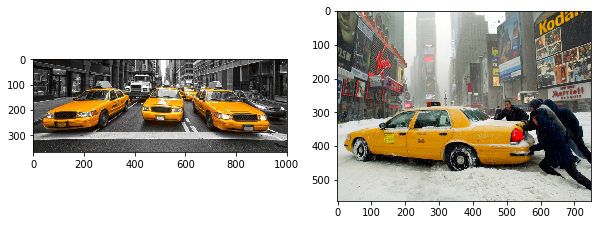

In [4]:
#New York Taxi
img_url = 'https://freetoursbyfoot.com/wp-content/uploads/2013/11/New-York-Taxi.jpg'
img_url1 = 'https://amp.businessinsider.com/images/57fe8bd952dd731a008b45cd-750-562.jpg'
taxi_img = read_image_url(img_url)
taxi_img1 = read_image_url(img_url1)
show_image(taxi_img, taxi_img1)

## Show HSV image
แสดงภาพสีแบบ HSV

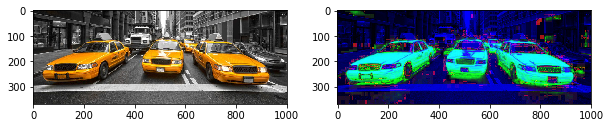

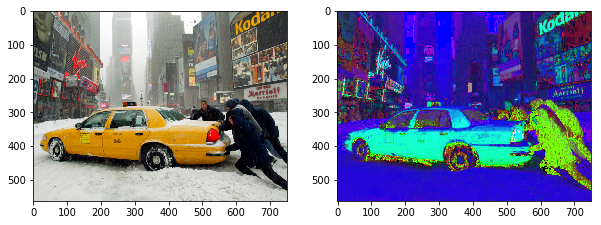

In [5]:
hsv_taxi = cv2.cvtColor(taxi_img, cv2.COLOR_RGB2HSV)
hsv_taxi1 = cv2.cvtColor(taxi_img1, cv2.COLOR_RGB2HSV)

show_image(taxi_img, hsv_taxi)
show_image(taxi_img1, hsv_taxi1)

## Show each HSV channel
แสดงรูปภาพของแต่ละค่าสี HSV

Show H and S values


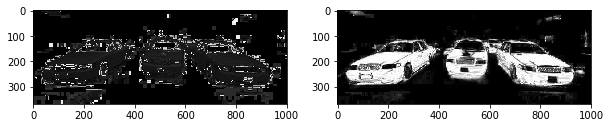

Show V values


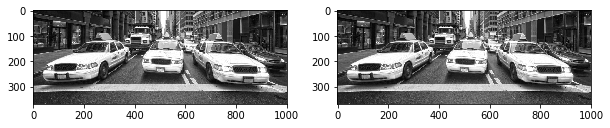

Show H and S values


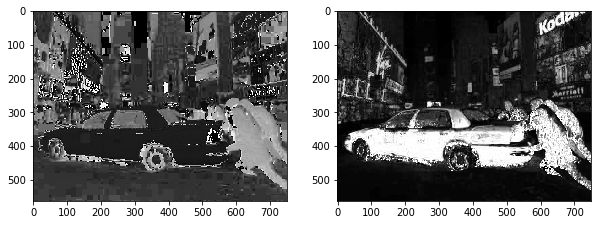

Show V values


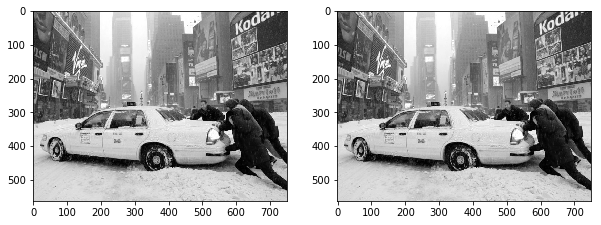

In [6]:
h, s, v = cv2.split(hsv_taxi)
print('Show H and S values')
show_image(h,s)
print('Show V values')
show_image(v,v)

h, s, v = cv2.split(hsv_taxi1)
print('Show H and S values')
show_image(h,s)
print('Show V values')
show_image(v,v)

## Picking HSV color
เลือกรูปภาพบริเวณที่ต้องการแสดงค่าสี HSV

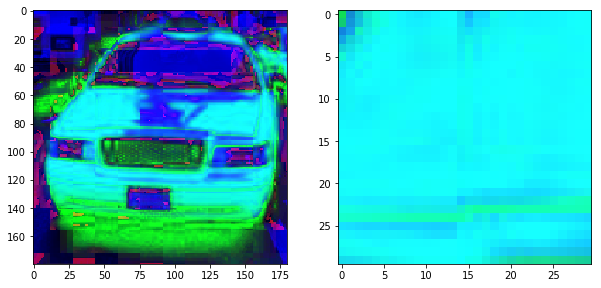

In [28]:
taxi = hsv_taxi[100:280,420:600]
taxi_zoom = hsv_taxi[160:190,450:480]

show_image(taxi,taxi_zoom)

In [21]:
print('Shape', taxi_zoom.shape)
print('H\n', taxi_zoom[5:10, 5:10, 0])
print('S\n', taxi_zoom[5:10, 5:10, 1])
print('V\n', taxi_zoom[5:10, 5:10, 2])

Shape (30, 30, 3)
H
 [[20 20 20 20 20]
 [19 20 20 20 21]
 [20 20 20 21 21]
 [20 20 20 21 21]
 [20 20 21 21 20]]
S
 [[254 254 250 245 241]
 [255 254 249 247 244]
 [252 253 253 251 251]
 [251 253 250 250 253]
 [251 251 250 252 255]]
V
 [[255 255 254 252 251]
 [252 255 255 252 251]
 [255 255 253 250 249]
 [255 255 255 253 250]
 [255 255 255 252 251]]


## Show Range of HSV value
แสดงช่วงของค่าสี HSV

In [35]:
# HSV color
colorRange = [19, 241, 245]
lowerLimit, upperLimit = HSV_range(colorRange)
print('lower HSV Limit: ', lowerLimit)
print('upper HSV Limit: ', upperLimit)

lower HSV Limit:  [ 19 100 100]
upper HSV Limit:  [ 39 255 255]


### ทดสอบด้วยค่าสี HSV [19, 241, 245]

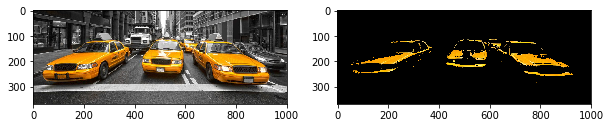

In [36]:
colorRange = [19, 241, 245]
lowerLimit, upperLimit = HSV_range(colorRange)
# taxi 
mask = cv2.inRange(hsv_taxi, lowerLimit, upperLimit)
result = cv2.bitwise_and(taxi_img, taxi_img, mask=mask)

show_image(taxi_img,result)

### ทดสอบด้วยค่าสี HSV [25, 250, 250]

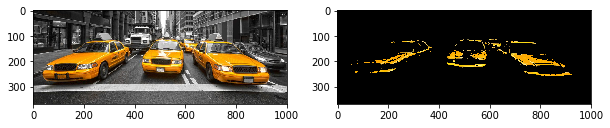

In [37]:
colorRange = [25, 250, 250]
lowerLimit, upperLimit = HSV_range(colorRange)
# taxi 
mask = cv2.inRange(hsv_taxi, lowerLimit, upperLimit)
result = cv2.bitwise_and(taxi_img, taxi_img, mask=mask)

show_image(taxi_img,result)

### ทดสอบด้วยค่าสี HSV [10, 80, 100]

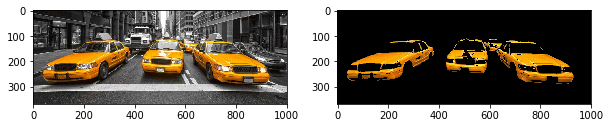

In [54]:
colorRange = [10, 80, 100]
lowerLimit, upperLimit = HSV_range(colorRange)
# taxi 
mask = cv2.inRange(hsv_taxi, lowerLimit, upperLimit)
result = cv2.bitwise_and(taxi_img, taxi_img, mask=mask)

show_image(taxi_img,result)

### ทดสอบรูปใหม่

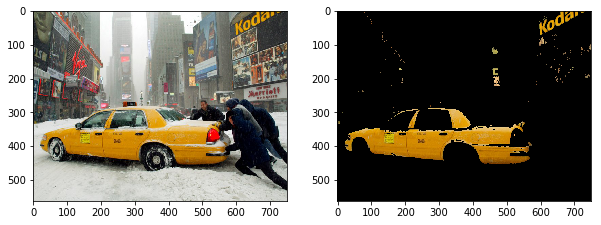

In [63]:
# taxi 
mask1 = cv2.inRange(hsv_taxi1, lowerLimit, upperLimit)
result = cv2.bitwise_and(taxi_img1, taxi_img1, mask=mask1)

show_image(taxi_img1,result)

## Show Mask Image
แสดงรูปมาร์ก

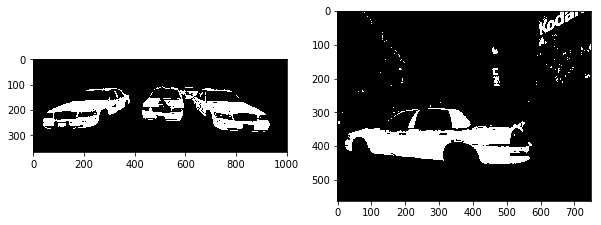

In [56]:
show_image(mask,mask1)

## Liverpool

RGB and HSV images


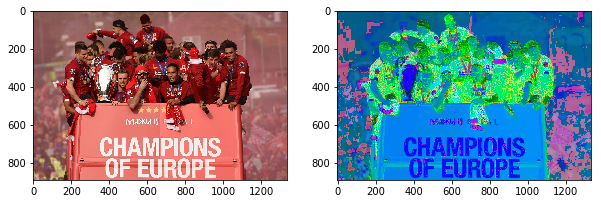

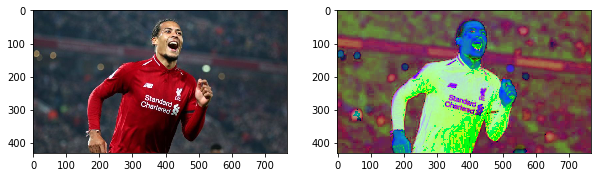

In [59]:
img_url = 'https://amp.businessinsider.com/images/5d5fa8a29563f44ada4c5e22-1334-888.jpg'
img_url1 = 'https://img.maximummedia.ie/joe_co_uk/eyJkYXRhIjoie1widXJsXCI6XCJodHRwOlxcXC9cXFwvbWVkaWEtam9lY291ay5tYXhpbXVtbWVkaWEuaWUuczMuYW1hem9uYXdzLmNvbVxcXC93cC1jb250ZW50XFxcL3VwbG9hZHNcXFwvMjAxOVxcXC8wM1xcXC8xNDEwNTc1MFxcXC9HZXR0eUltYWdlcy0xMTMyNjIxODM3LTEtMTAyNHg2ODQuanBnXCIsXCJ3aWR0aFwiOjc2NyxcImhlaWdodFwiOjQzMSxcImRlZmF1bHRcIjpcImh0dHBzOlxcXC9cXFwvd3d3LmpvZS5jby51a1xcXC9hc3NldHNcXFwvaW1hZ2VzXFxcL2pvZWNvdWtcXFwvbm8taW1hZ2UucG5nP2lkPTQzYmNhOWRlN2ViMjY5NzM3YTBmXCIsXCJvcHRpb25zXCI6W119IiwiaGFzaCI6IjIzNzhmZjAyMjg0Y2YwZjhhYzZiYTUwOGUxMTAxNjNhOGJkNTM5YTcifQ==/gettyimages-1132621837-1-1024x684.jpg'
liverpool_img = read_image_url(img_url)
liverpool_img1 = read_image_url(img_url1)

hsv_liverpool = cv2.cvtColor(liverpool_img, cv2.COLOR_RGB2HSV)
hsv_liverpool1 = cv2.cvtColor(liverpool_img1, cv2.COLOR_RGB2HSV)

print('RGB and HSV images')
show_image(liverpool_img, hsv_liverpool)
show_image(liverpool_img1, hsv_liverpool1)

## Splie HSV color
แยกค่าสี HSV

S value


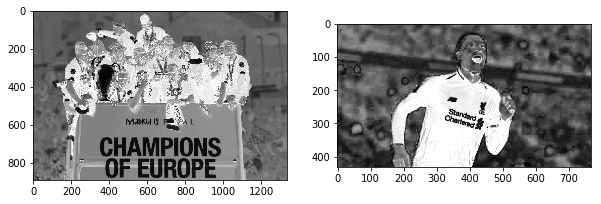

V value


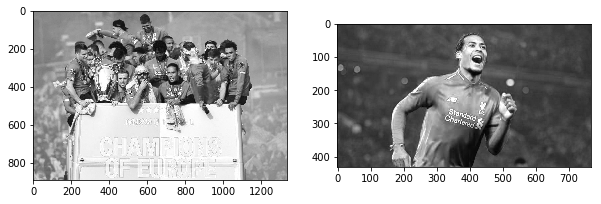

In [62]:
h, s, v = cv2.split(hsv_liverpool)
h1, s1, v1 = cv2.split(hsv_liverpool1)

print('S value')
show_image(s, s1)

print('V value')
show_image(v, v1)

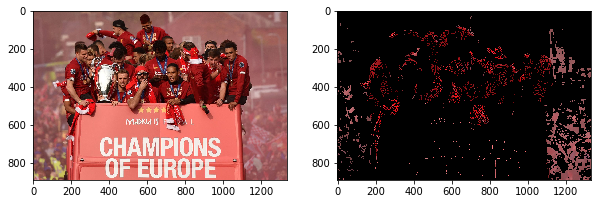

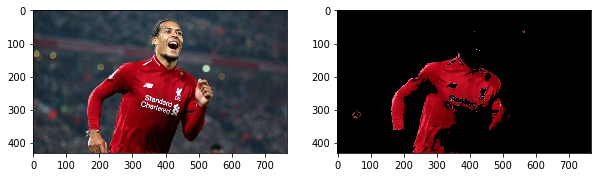

In [76]:
colorRange = [100, 80, 150]
lowerLimit, upperLimit = HSV_range(colorRange)

mask1 = cv2.inRange(hsv_liverpool, lowerLimit, upperLimit)
result1 = cv2.bitwise_and(liverpool_img, liverpool_img, mask=mask1)

mask2 = cv2.inRange(hsv_liverpool1, lowerLimit, upperLimit)
result2 = cv2.bitwise_and(liverpool_img1, liverpool_img1, mask=mask2)

show_image(liverpool_img,result1)
show_image(liverpool_img1,result2)

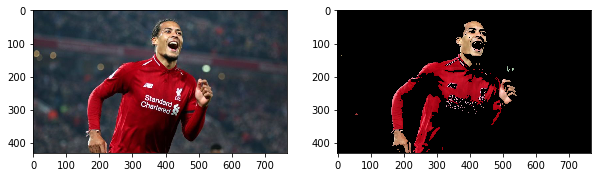

In [0]:
img_url = 'https://img.maximummedia.ie/joe_co_uk/eyJkYXRhIjoie1widXJsXCI6XCJodHRwOlxcXC9cXFwvbWVkaWEtam9lY291ay5tYXhpbXVtbWVkaWEuaWUuczMuYW1hem9uYXdzLmNvbVxcXC93cC1jb250ZW50XFxcL3VwbG9hZHNcXFwvMjAxOVxcXC8wM1xcXC8xNDEwNTc1MFxcXC9HZXR0eUltYWdlcy0xMTMyNjIxODM3LTEtMTAyNHg2ODQuanBnXCIsXCJ3aWR0aFwiOjc2NyxcImhlaWdodFwiOjQzMSxcImRlZmF1bHRcIjpcImh0dHBzOlxcXC9cXFwvd3d3LmpvZS5jby51a1xcXC9hc3NldHNcXFwvaW1hZ2VzXFxcL2pvZWNvdWtcXFwvbm8taW1hZ2UucG5nP2lkPTQzYmNhOWRlN2ViMjY5NzM3YTBmXCIsXCJvcHRpb25zXCI6W119IiwiaGFzaCI6IjIzNzhmZjAyMjg0Y2YwZjhhYzZiYTUwOGUxMTAxNjNhOGJkNTM5YTcifQ==/gettyimages-1132621837-1-1024x684.jpg'
img = read_image_url(img_url)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_color = np.array([50, 40, 150])    #B, G, R
upper_color = np.array([180, 255, 255])

mask = cv2.inRange(hsv, lower_color, upper_color)
result = cv2.bitwise_and(img, img, mask=mask)
show_image(img, result)